##Final Project

###Analyzing Udemy Courses

Data: This data was taken from [Kaggle]('https://www.kaggle.com/andrewmvd/udemy-courses'). 

![0*ck19RC019ErjyQ7i](https://user-images.githubusercontent.com/55968160/91507702-4771e980-e88a-11ea-9bb3-bcf6ee176c9c.png)

This dataset contains 3,682 records of courses from 4 subjects (Business Finance, Graphic Design, Musical Instruments and Web Design) taken from Udemy.

Udemy is a massive online open course (MOOC) platform that offers both free and paid courses. Anybody can create a course, a business model by which allowed Udemy to have hundreds of thousands of courses.

Aim: To analyze the user response for the courses offered on Udemy and provide actionable insights.

**Table Of Content:**

- **Paid vs Free Courses**

- **Relation between Reviews and Paid/Free Courses**

- **Countplot for Different Courses**

- **Top 5 Web Development Courses**

- **Relation between Price and Difficulty Level**

- **Relation between Subjects and Price**

- **Hypothesis 1: Duration against Content Duration**

- **Hypothesis 2: Subscribers for Paid/Unpaid Courses**

- **Conclusion**

- **Future Research Proposal**

**Process Flow:** 

Exploratory Data Analysis ->
Data Visualization ->
Data Wrangling -> Reports.



_Special thanks to Fred and Kihoon for guiding me throughout the course._


In [1]:
#Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Reading Data from Git
url = 'https://raw.githubusercontent.com/sajithgowthaman/Recipe-GA/master/udemy_courses.csv'
df = pd.read_csv(url)

In [3]:
#EDA Begins!
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [4]:
print(df.shape)
print (f'\n There are {df.shape[0]} rows and {df.shape[1]} columns.')

(3678, 12)

 There are 3678 rows and 12 columns.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [6]:
#Considering only numerical columns that makes sense.
df[1::].describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.677000e+03,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000
mean,6.758645e+05,66.013054,3197.436225,156.295349,40.105793,4.095223
std,3.432580e+05,60.974029,9505.393863,935.576691,50.389878,6.054513
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076580e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.877420e+05,45.000000,911.000000,18.000000,25.000000,2.000000
75%,9.608980e+05,95.000000,2547.000000,67.000000,45.000000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [7]:
#Drop columns that are not required
df.drop(columns =['url','published_timestamp', 'course_id' ], inplace= True)

#Change True to Paid and False to Unpaid
df.is_paid = df.is_paid.astype(str)
df.is_paid = df.is_paid.replace('True','Paid').replace('False','Free')


The number of paid courses are: 3368 out of 3678 which is 91.57 % of the total sample.



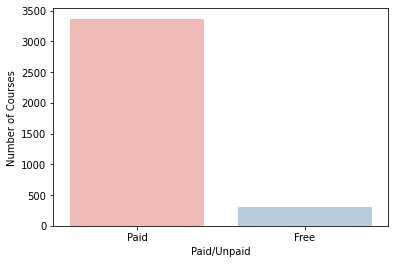

In [8]:
#Plotting the number of courses
print('')
print('The number of paid courses are:', df.is_paid.value_counts()[0],'out of',len(df.is_paid),'which is',np.round((df.is_paid.value_counts()[0]/len(df.is_paid))*100,decimals=2),'% of the total sample.')
print('')
sns.countplot(df.is_paid,palette='Pastel1')
plt.xlabel('Paid/Unpaid')
plt.ylabel('Number of Courses');

**We have about 3368 paid courses and 310 free courses.**

**The data is skewed in terms of paid or unpaid courses. Well, most courses ARE paid in Udemy.**

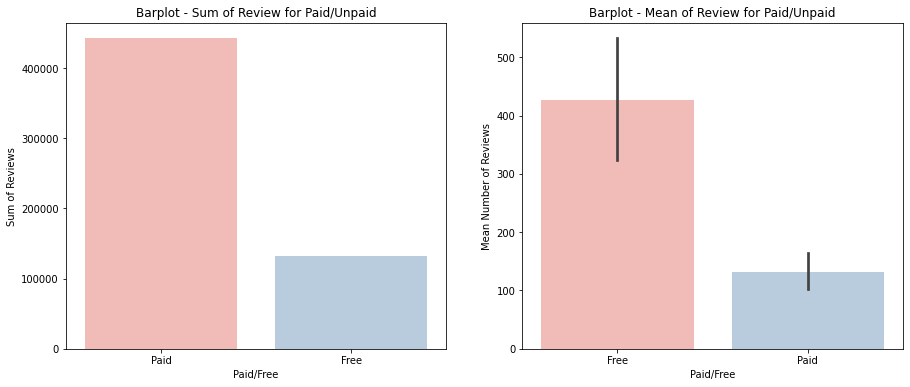

In [9]:
#Reviews for Paid vs Unpaid
fig, axes = plt.subplots(1,2, figsize=(15,6))

#Let's check the number of reviews for paid and unpaid courses.
df_count = df.groupby(by=['is_paid'])['num_reviews'].sum().reset_index()
df_count.sort_values('num_reviews', ascending=False, inplace=True)
df_count = pd.DataFrame(df_count)
df_count.head()

#Plot for price and number of reviews
ax = sns.barplot(x="is_paid", y="num_reviews", palette= 'Pastel1', data=df_count, ax = axes[0]);
ax.set(xlabel='Paid/Free', ylabel= 'Sum of Reviews', title = 'Barplot - Sum of Review for Paid/Unpaid');

order_pf = ['Free', 'Paid']
ax = sns.barplot(x="is_paid", y="num_reviews", palette= 'Pastel1', data=df, order = order_pf, ax = axes[1]);
ax.set(xlabel='Paid/Free', ylabel= 'Mean Number of Reviews', title = 'Barplot - Mean of Review for Paid/Unpaid');

- **In total Paid courses had more reviews than free courses.**

- **However, on average, Free courses had more reviews than paid.** 

- **This is largely due to the fact that the data consists of 91% of paid courses, which eventually leads to the large spurious sum.**

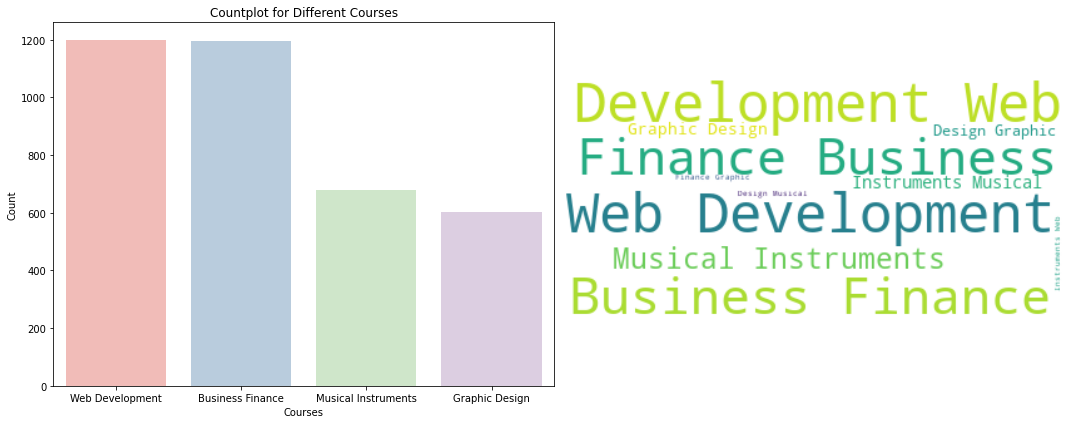

In [10]:
#Countplot for Different Courses
fig, axes = plt.subplots(1,2, figsize=(15,6))

ax=axes[0]
orders = ['Web Development', 'Business Finance', 'Musical Instruments', 'Graphic Design']
ax2 = sns.countplot(df.subject, palette='Pastel1', order= orders, ax=axes[0], )
ax2.set(
    xlabel="Courses",
    ylabel="Count",
    title="Countplot for Different Courses")

# Generate a word cloud image
wc = WordCloud(background_color="white").generate(" ".join(df["subject"]))
# Display the generated image:
axes[1].imshow(wc, interpolation='bilinear', )
axes[1].axis("off")
plt.tight_layout()
plt.show()
plt.close()

**Web Developments had the most number of courses in the data, followed by Business Finance**

It is interesting to see more Musical Instrument courses than Graphic Design.

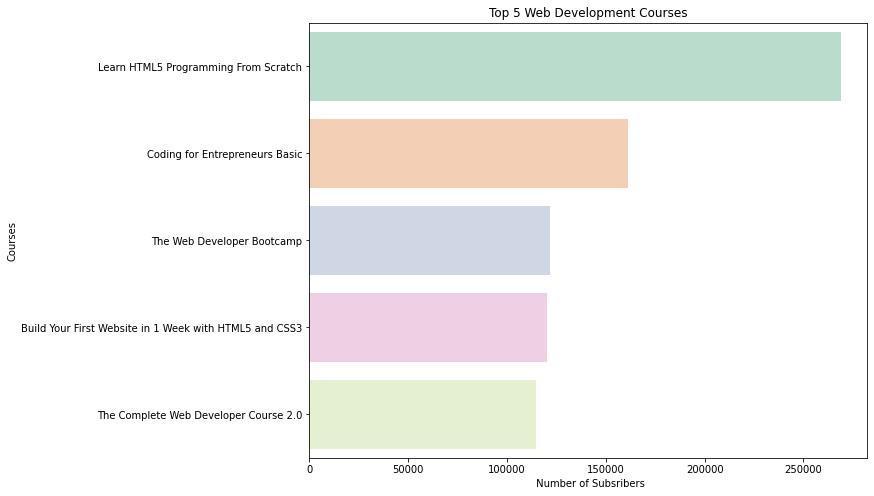

In [11]:
#Top 5 Web Development courses:

#Sort
df_top5_web_courses = df.sort_values(by = ['num_subscribers'], ascending=False)

#Grab the course_title and num_subscribers
top_course = df_top5_web_courses.loc[df_top5_web_courses['subject'] == 'Web Development', 'course_title']
top_course_rating = df_top5_web_courses.loc[df_top5_web_courses['subject'] == 'Web Development', 'num_subscribers']

#Create a dataframe
df_top_course = pd.DataFrame(top_course)
df_top_course_sub = pd.DataFrame(top_course_rating)

#Performing a merge on the two dataframes
df_top_course = df_top_course.merge(df_top_course_sub, left_index=True, right_index=True)
df_top_course.reset_index(inplace=True)
df_top_course.drop(columns=['index'],inplace = True)

#Visualize the top 5 Courses using Seaborn
plt.figure(figsize=(10,8))

top_five= df_top_course.nlargest(5,'num_subscribers')
ax = sns.barplot(x="num_subscribers",y='course_title', data=top_five, palette= 'Pastel2');
ax.set(xlabel= ' Number of Subsribers', ylabel= 'Courses', title = 'Top 5 Web Development Courses');

**In order to find the top 5 Web Development courses, the data had to be wrangled and mapped in a way that it provides the desired output.**

- Most courses were related to HTML5 and it had over 250,000 subscribers.

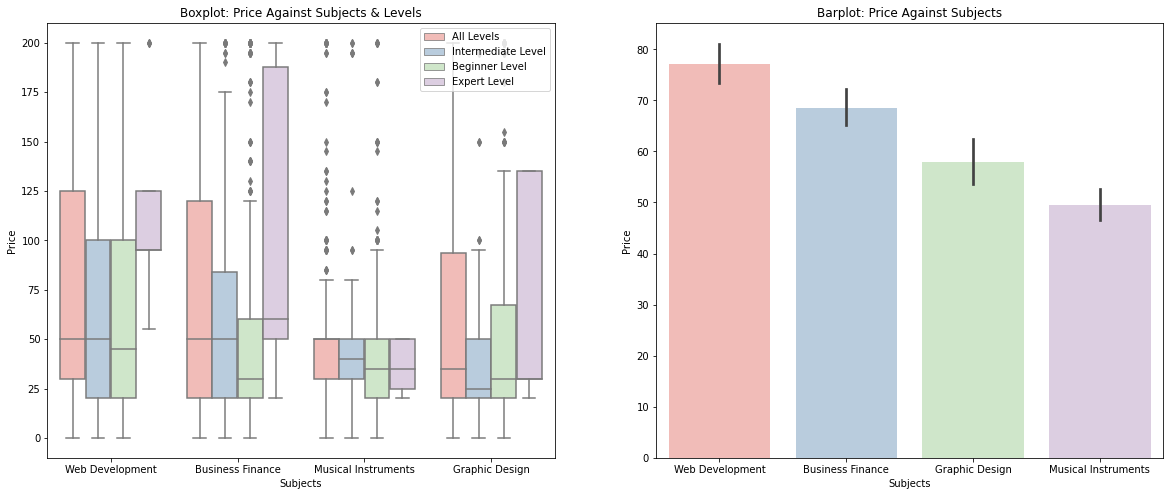

In [12]:
#Courses vs Price

#Let's find the most expensive courses and their levels
fig, axes = plt.subplots(1,2, figsize=(20,8))

#Boxplot for Price vs Subjects and Levels
ax = sns.boxplot(x=df.subject, y=df.price, palette='Pastel1', order= orders, hue=df.level, ax= axes[0])
ax.set(
    xlabel="Subjects",
    ylabel="Price",
    title="Boxplot: Price Against Subjects & Levels");
ax.legend(loc='upper right');

#Barplot for Price vs Subjects and Levels
orders = ['Web Development', 'Business Finance', 'Graphic Design','Musical Instruments']
ax1 = sns.barplot(x=df.subject, y=df.price, palette='Pastel1', order= orders, ax = axes[1]);
ax1.set(
    xlabel="Subjects",
    ylabel="Price",
    title="Barplot: Price Against Subjects");

**The price for web development were on average more than the others. It is largely due to the fact that Web Development courses were top rated compared to the rest of the courses.**

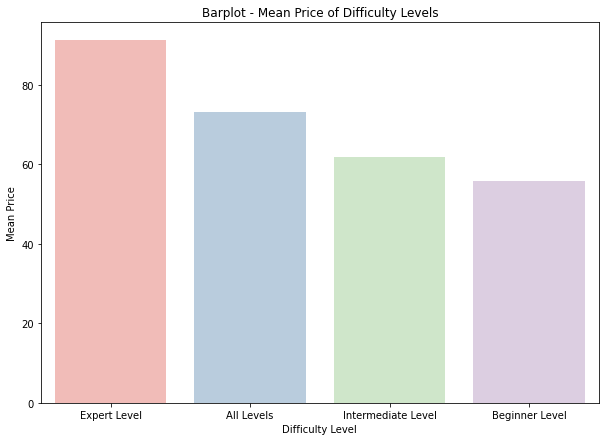

In [13]:
#Price vs Difficulty Level

#Create a copy of dataframe and order it by mean of price:
df_levels = df.copy()
df_levels = df_levels.groupby(by = 'level')['price'].mean().reset_index()
df_levels.sort_values('price', ascending=False, inplace=True)

#Plot for mean price and difficulty level
plt.figure(figsize=(10,7))
ax = sns.barplot(x=df_levels["level"], y=df_levels["price"], palette= 'Pastel1');
ax.set(ylabel='Mean Price', xlabel= 'Difficulty Level', title="Barplot - Mean Price of Difficulty Levels");

**Expert Level courses were on average more expensive than the rest of the courses, followed by "All Levels".**

- There is not much difference between Intermediate and Beginner Level courses.

In [14]:
#Content Duration
#Avg price for content_duration from 0 to 40 hours and 40 to 80 hours
df_0_to_40_hours = df[df['content_duration'] <= 40.0]
df_40_to_80_hours = df[df['content_duration'] >= 40.0]

print(f'The average price for courses with 0 to 40 hours of content is: {np.round(df_0_to_40_hours.price.mean(), decimals=2)} hours.\n')
print(f'The average price for courses with 40 to 80 hours of content is: {np.round(df_40_to_80_hours.price.mean(), decimals=2)} hours.')

The average price for courses with 0 to 40 hours of content is: 65.56 hours.

The average price for courses with 40 to 80 hours of content is: 151.9 hours.


### Hypothesis:
**Hypothesis (Ho): As the content duration increases, the difficulty of the course increases.** 

We are going to test a hypothesis to see if the difficulty level increases with increase in duration. Usually the courses with longer duration are said to be more difficult to complete. Let's try it out by plotting.

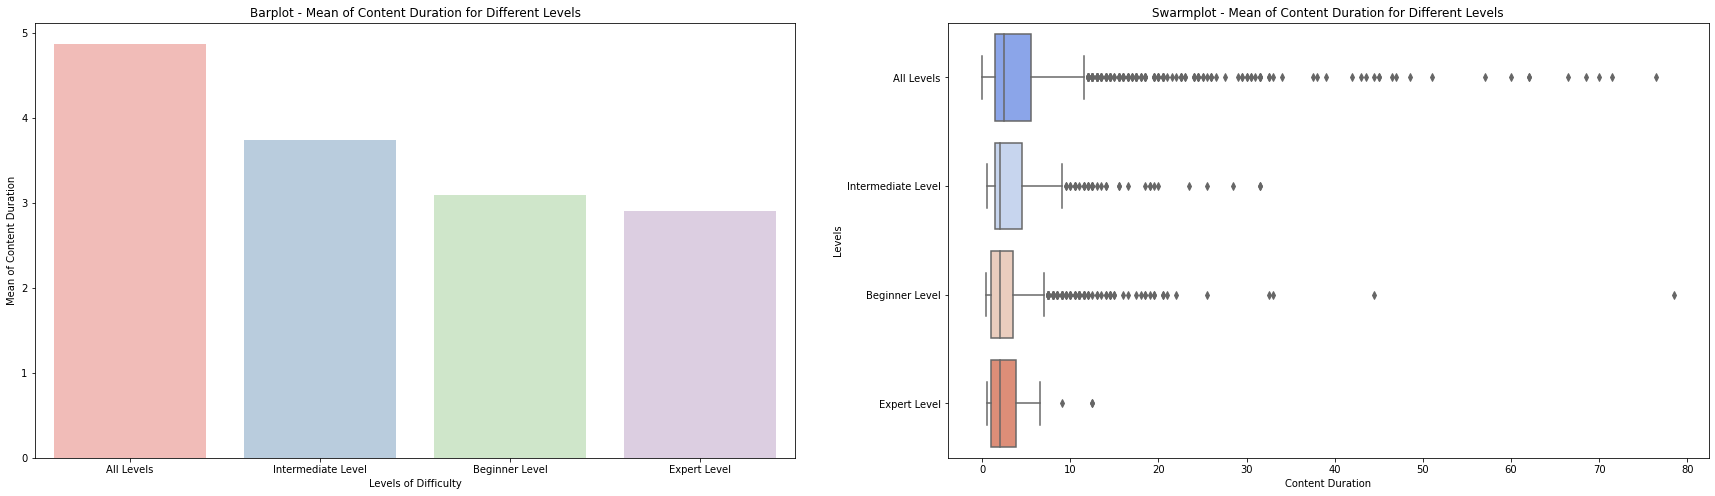

In [15]:
#Expert Level Courses have more duration
fig, axes = plt.subplots(1,2, figsize=(30,8))

#Groupby Data
df_dur1 = df.copy()
df_dur1 = df_dur1.groupby(by = 'level')['content_duration'].mean().reset_index()
df_dur1.sort_values('content_duration', ascending=False, inplace=True)

#Barplot for Duration vs Levels
ax = sns.barplot(x=df_dur1["level"], y=df_dur1["content_duration"], palette= 'Pastel1', ax = axes[0]);
ax.set(ylabel='Mean of Content Duration', 
       xlabel= 'Levels of Difficulty', 
       title= "Barplot - Mean of Content Duration for Different Levels");

#Swarmplot for Duration vs Levels
ax1 = sns.boxplot(x=df["content_duration"], y=df["level"], palette='coolwarm', ax = axes[1]);
ax1.set(ylabel='Levels',
        xlabel= 'Content Duration',
        title= "Swarmplot - Mean of Content Duration for Different Levels");

**Hypothesis failed, infact Expert Level had the least amount duration. The level of difficulty does not mean the course must be lengthy.**

We could get the exact amount of on average how much the duration differs based on duration by initiating a T-test and acquiring the P-value.

**Hypothesis 2: The number of subscribers are more for free courses.**

Let's plot to check if the number of subscribers are more for free courses. Usually there are more subscribers for free content than paid.

The mean number subscribers for paid courses were: 2429.81

The mean number of subscribers for free courses were: 11533.95
There were more subscribers on average for courses that were offered free than the paid courses. 



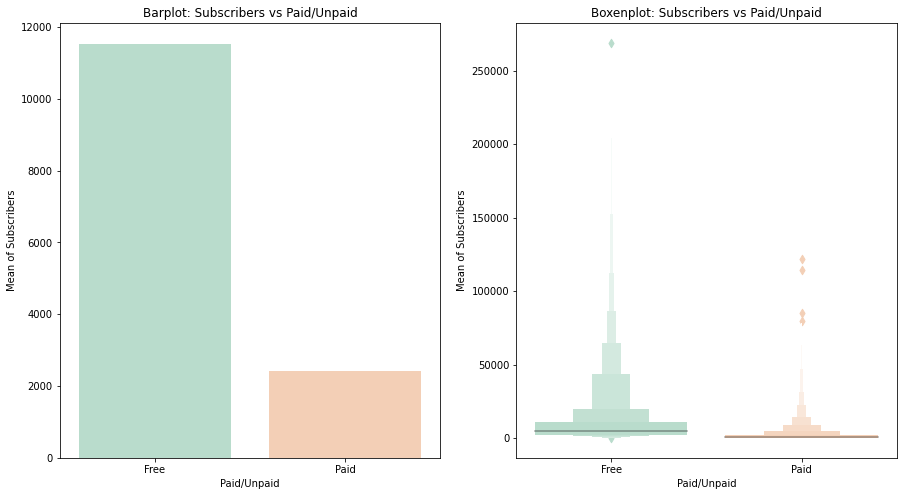

In [16]:
#Interesting - Free courses have more subscribers
fig, axes = plt.subplots(1,2, figsize=(15,8))

#plot2 - groupby is_paid
df_sub = df.groupby(by=['is_paid'])['num_subscribers'].mean().reset_index()
df_sub.sort_values('num_subscribers', ascending=False, inplace=True)
df_sub = pd.DataFrame(df_sub)

#Barplot for Sub vs Paid/Unpaid
ax = sns.barplot(x=df_sub["is_paid"], y=df_sub["num_subscribers"], palette= 'Pastel2', ax=axes[0]);
ax.set(xlabel= 'Paid/Unpaid', 
       ylabel= 'Mean of Subscribers',
       title = 'Barplot: Subscribers vs Paid/Unpaid')

#Get rid off the scientific notation for simplicity
plt.ticklabel_format(style='plain', axis='y')

print (f'The mean number subscribers for paid courses were: {np.round(df_sub["num_subscribers"][1],decimals=2)}\n')
print (f'The mean number of subscribers for free courses were: {np.round(df_sub["num_subscribers"][0],decimals=2)}')


#Boxenplot for paid vs unpaid
orders = ['Free', 'Paid']
ax1 = sns.boxenplot(x=df["is_paid"], y=df["num_subscribers"], palette = 'Pastel2', order = orders, ax =axes[1]);
ax1.set(xlabel= 'Paid/Unpaid',
        ylabel= 'Mean of Subscribers',
        title = 'Boxenplot: Subscribers vs Paid/Unpaid')


print('There were more subscribers on average for courses that were offered free than the paid courses. \n')

**Fail to reject Hypothesis. Free courses do have more subscribers than that of paid**



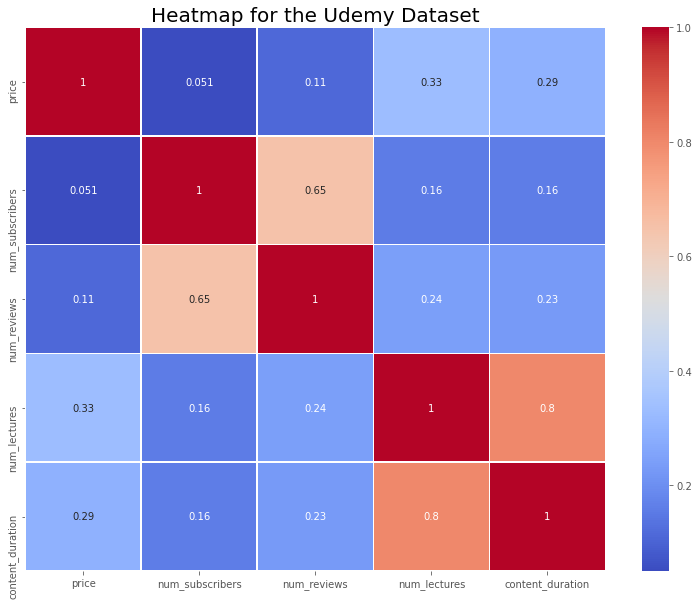

In [17]:
plt.rcParams['figure.figsize'] = (13, 10)
plt.style.use('ggplot')

sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', linewidths=0.5)
plt.title('Heatmap for the Udemy Dataset', fontsize = 20);

Let's check what drives the courses to be paid or unpaid with the help of a pairplot.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


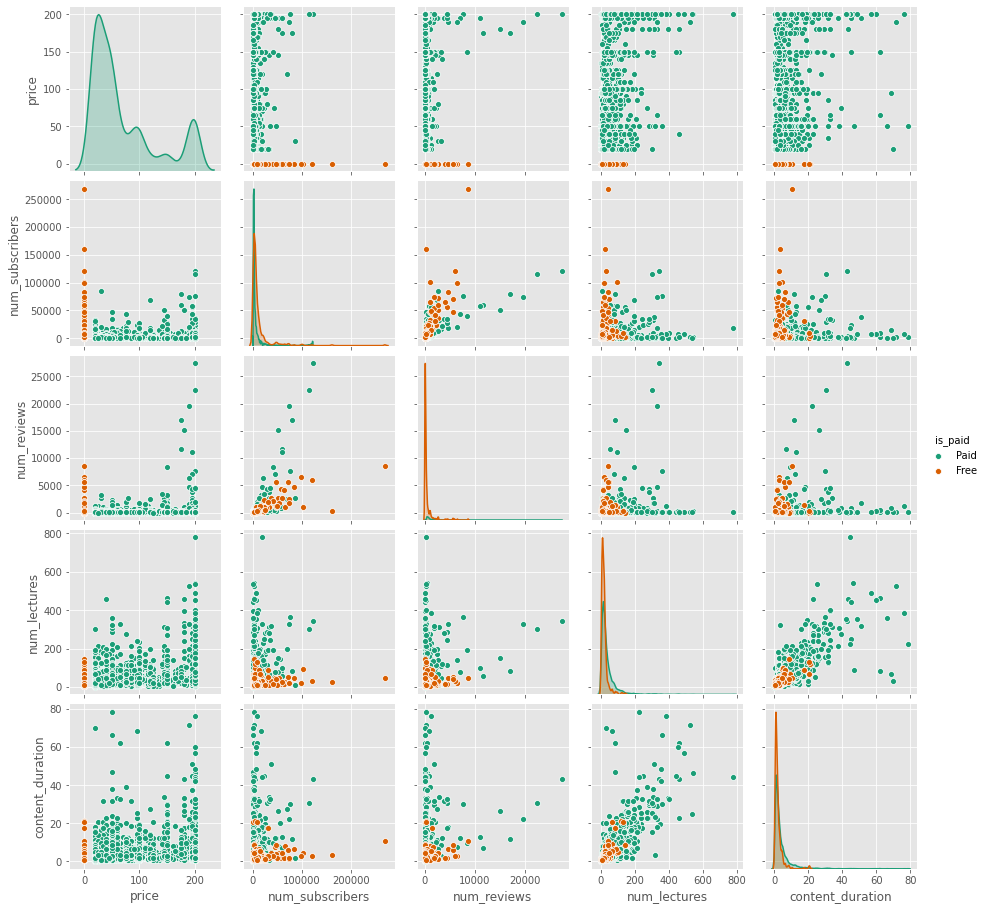

In [18]:
#Pairplots - correlation for paid/unpaid courses.
sns.pairplot(df,hue='is_paid',palette='Dark2');

We could see that most of the free courses were found to be at the bottom left of the graph. 

We can see that as the number of reviews, subscribers, lectures and content_duration increases, the courses are slowly converted to paid from being offered free.

Here is a link that shows what drive courses to be paid/unpaid: 

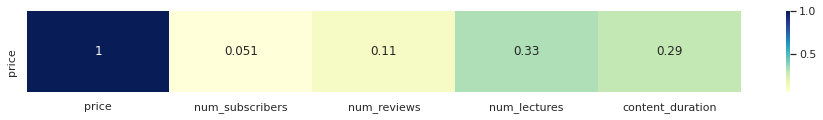

In [19]:
# Correlation with only target variables
sns.set(rc={'figure.figsize':(16,1.5)})
sns.heatmap(pd.DataFrame(pd.DataFrame(df.corr()).price).T,annot=True, cmap='YlGnBu');

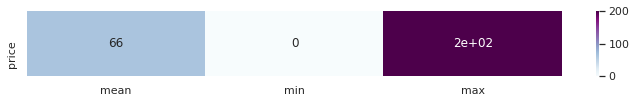

Distribution: 



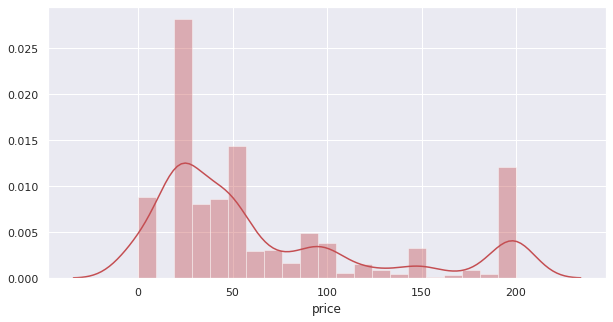

In [20]:
sns.set(rc={'figure.figsize':(12,1.2)})
sns.heatmap((pd.DataFrame(df.price.describe()).T)[['mean', 'min', 'max']], annot=True,  cmap='BuPu')
plt.show()

print('Distribution: \n')
sns.set(rc={'figure.figsize':(10,5)})
ax= sns.distplot(df.price, color='r');

#Key Takeaways:
The data has provided many actionable insights that could be of potential use for both students/Udemy/lecturers. 

-
-
-
-
-

####Future Research
For the purpose of future research, if there is a feature that provides employment information after taking the class that would give us a better insights for what actualy courses are worth investing your time in. 

We could build a price prediction model with more data points using Linear Regression ML model.


Thank you!